In [1]:
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
CORPUS = [
    'apple banana apple banana orange', 
    'apple orange banana orange', 
    'orange apple apple banana apple',
    'carrot spinach eggplant carrot',
    'spinach carrot potato spinach',
    'carrot potato eggplant eggplant'
]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
features = vec.fit_transform(CORPUS)

In [4]:
vec.get_feature_names_out()

array(['apple', 'banana', 'carrot', 'eggplant', 'orange', 'potato',
       'spinach'], dtype=object)

In [5]:
X = np.array(features.todense())
X

array([[2, 2, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 2, 0, 0],
       [3, 1, 0, 0, 1, 0, 0],
       [0, 0, 2, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 2],
       [0, 0, 1, 2, 0, 1, 0]], dtype=int64)

In [6]:
XTX = np.dot(X.T,X)

In [7]:
XTX.shape

(7, 7)

In [8]:
XTX

array([[14,  8,  0,  0,  7,  0,  0],
       [ 8,  6,  0,  0,  5,  0,  0],
       [ 0,  0,  6,  4,  0,  2,  4],
       [ 0,  0,  4,  5,  0,  2,  1],
       [ 7,  5,  0,  0,  6,  0,  0],
       [ 0,  0,  2,  2,  0,  2,  2],
       [ 0,  0,  4,  1,  0,  2,  5]], dtype=int64)

In [9]:
np.linalg.matrix_rank(XTX)

6

In [10]:
eigVals, eigVecs = np.linalg.eig(XTX)

In [11]:
eigVals

array([23.22497216,  2.        ,  0.77502784, 12.74456265,  4.        ,
       -0.        ,  1.25543735])

In [12]:
eigvec1 = eigVecs[:, 0]
eigvec2 = eigVecs[:, 3]

In [13]:
eigvec1

array([-0.75511545, -0.48025006,  0.        ,  0.        , -0.44627407,
        0.        ,  0.        ])

In [14]:
eigvec2

array([ 0.        ,  0.        , -0.66353532, -0.48352718,  0.        ,
       -0.30351904, -0.48352718])

In [15]:
doc1 = X[0]

In [16]:
doc1

array([2, 2, 0, 0, 1, 0, 0], dtype=int64)

In [17]:
np.dot(doc1,eigvec1)

-2.917005078618542

In [18]:
np.dot(doc1,eigvec2)

0.0

## gensim을 이용한 LSI

In [19]:
docs_words = [doc.split() for doc in CORPUS]

In [20]:
docs_words

[['apple', 'banana', 'apple', 'banana', 'orange'],
 ['apple', 'orange', 'banana', 'orange'],
 ['orange', 'apple', 'apple', 'banana', 'apple'],
 ['carrot', 'spinach', 'eggplant', 'carrot'],
 ['spinach', 'carrot', 'potato', 'spinach'],
 ['carrot', 'potato', 'eggplant', 'eggplant']]

In [53]:
from gensim.corpora import Dictionary

In [54]:
dictionary = Dictionary(docs_words)

In [55]:
print(dictionary.token2id)

{'apple': 0, 'banana': 1, 'orange': 2, 'carrot': 3, 'eggplant': 4, 'spinach': 5, 'potato': 6}


In [56]:
DTM = []
for doc in docs_words:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [57]:
DTM

[[(0, 2), (1, 2), (2, 1)],
 [(0, 1), (1, 1), (2, 2)],
 [(0, 3), (1, 1), (2, 1)],
 [(3, 2), (4, 1), (5, 1)],
 [(3, 1), (5, 2), (6, 1)],
 [(3, 1), (4, 2), (6, 1)]]

In [58]:
from gensim.models import LsiModel

In [66]:
model = LsiModel(DTM, num_topics=2, id2word=dictionary) 

In [67]:
model.print_topics()

[(0,
  '0.755*"apple" + 0.480*"banana" + 0.446*"orange" + -0.000*"carrot" + -0.000*"spinach" + -0.000*"eggplant" + 0.000*"potato"'),
 (1,
  '-0.664*"carrot" + -0.484*"eggplant" + -0.484*"spinach" + -0.304*"potato" + 0.000*"banana" + -0.000*"apple" + 0.000*"orange"')]

In [68]:
# 각 주제와 관련이 높은 상위 k 개의 단어만 확인하기
k=3
model.print_topics(num_words=k)

[(0, '0.755*"apple" + 0.480*"banana" + 0.446*"orange"'),
 (1, '-0.664*"carrot" + -0.484*"eggplant" + -0.484*"spinach"')]

In [69]:
model.get_topics()

array([[ 0.75511545,  0.48025006,  0.44627407, -0.        , -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , -0.66353532, -0.48352718,
        -0.48352718, -0.30351904]])

In [70]:
model[DTM[0]]

[(0, 2.917005078618543)]

In [30]:
from gensim.models import CoherenceModel

In [75]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):

    coherence_values = []

    for num_topics in range(start, limit, step):
        lsi_model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
        coherencemodel = CoherenceModel(model=lsi_model, corpus=corpus, dictionary=dictionary, 
                                        coherence='u_mass', topn=4)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [76]:
coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs_words, start=1, limit=5, step=1)

In [77]:
coherence_values

[-13.4689369676833,
 -7.009121556006427,
 -10.607346731203934,
 -15.696865416126261]

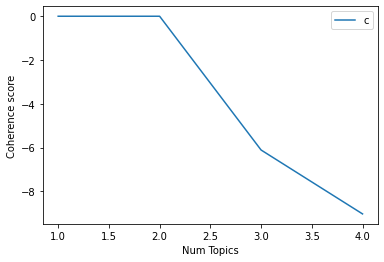

In [74]:
import matplotlib.pyplot as plt
limit=5; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()